In [63]:
from convpers import CPT
from convpers import Vectorize
from convpers import Testing
from convpers import Filters

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#To get the data: https://www.kaggle.com/datasets/rishianand/devanagari-character-set

In [64]:
#Load data
import pandas as pd
import numpy as np
dev = pd.read_csv("C:/Users/Elchanan/Desktop/Work/convperstran/data/dev_data.csv").to_numpy()
data = dev[:,:-1]
labels = dev[:,-1]
data = np.reshape(data,(len(data),32,32)).astype(np.float32)
idxs = np.random.choice(range(len(data)),3000)    
X = data[idxs]
y = labels[idxs]

Text(0.5, 0.98, 'Devanagari Script Examples')

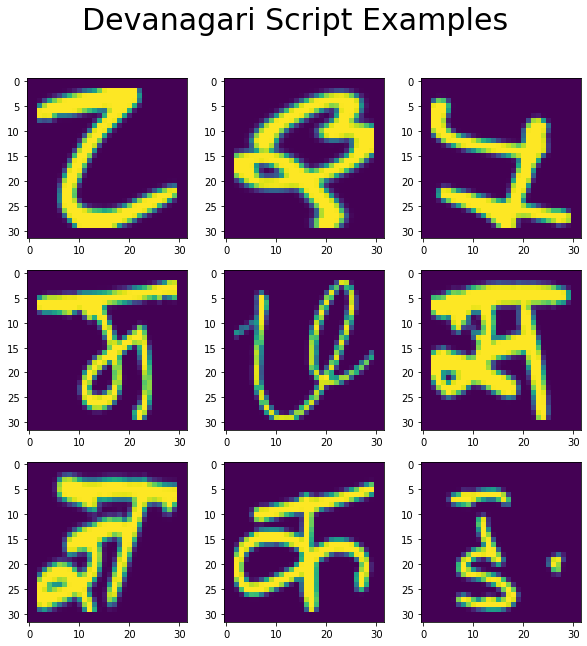

In [72]:
fig, axs = plt.subplots(3,3)
fig.set_size_inches(10,10)
axs[0,0].imshow(X[0])
axs[0,1].imshow(X[1])
axs[0,2].imshow(X[2])
axs[1,0].imshow(X[3])
axs[1,1].imshow(X[4])
axs[1,2].imshow(X[5])
axs[2,0].imshow(X[6])
axs[2,1].imshow(X[7])
axs[2,2].imshow(X[8])
fig.suptitle("Devanagari Script Examples",fontsize=30)

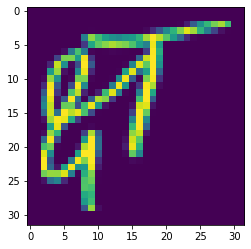

In [65]:
import matplotlib.pyplot as plt
plt.imshow(X[100])

In [38]:
print("There are :", len(np.unique(y)), "classes, giving a baseline accuracy of :", 1.0/len(np.unique(y)))

There are : 46 classes, giving a baseline accuracy of : 0.021739130434782608


kNN Results:  [0.061 0.075 0.073]
Average kNN Result:  0.06966666666666667
Gradient Boosting Results:  [0.114 0.106 0.11 ]
Average Gradient Boosting Result:  0.11


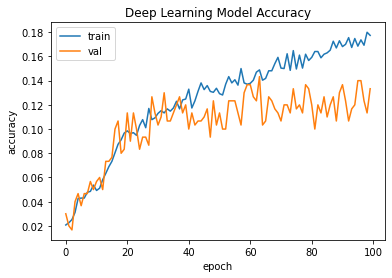

Final Validation Accuracy:  0.13333334028720856


In [41]:
#Experiment 1A: No Convolutions, Persistence Images Concatenated
filter = Filters.blur_kernel(1)
diagrams = CPT.CPT(X,[filter])
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.061 0.075 0.073]
Average kNN Result:  0.06966666666666667
Gradient Boosting Results:  [0.114 0.106 0.11 ]
Average Gradient Boosting Result:  0.11


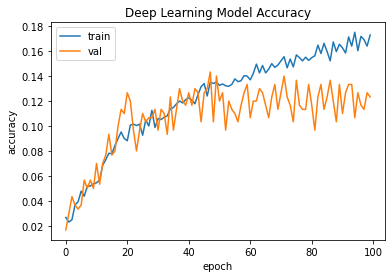

Final Validation Accuracy:  0.12333333492279053


In [42]:
#Experiment 1B: No Convolutions, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.063 0.071 0.092]
Average kNN Result:  0.07533333333333334
Gradient Boosting Results:  [0.089 0.093 0.101]
Average Gradient Boosting Result:  0.09433333333333334


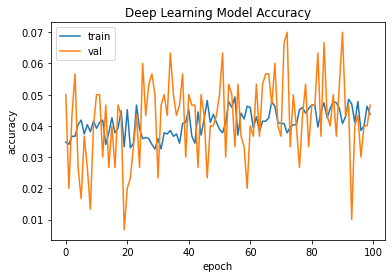

Final Validation Accuracy:  0.046666666865348816


In [43]:
#Experiment 1C: No Convolutions, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.063 0.071 0.092]
Average kNN Result:  0.07533333333333334
Gradient Boosting Results:  [0.089 0.093 0.101]
Average Gradient Boosting Result:  0.09433333333333334


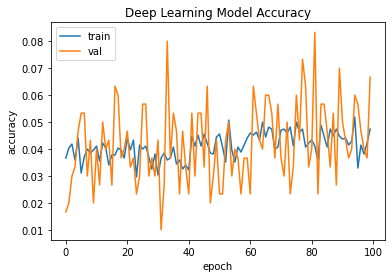

Final Validation Accuracy:  0.06666667014360428


In [44]:
#Experiment 1D: No Convolutions, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.1   0.09  0.097]
Average kNN Result:  0.09566666666666668
Gradient Boosting Results:  [0.157 0.139 0.184]
Average Gradient Boosting Result:  0.16


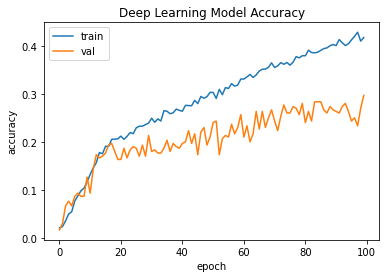

Final Validation Accuracy:  0.2966666519641876


In [45]:
#Experiment 2A: Adding Convolutions with Standard Filters, Persistence Images Concatenated
filter1 = Filters.blur_kernel(1)
filter2 = Filters.blur_kernel(3)
filter3 = Filters.gaussian_kernel(3)
filter4 = Filters.sharpening_kernel(3)
diagrams = CPT.CPT(X,[filter1,filter2,filter3,filter4])
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.105 0.112 0.116]
Average kNN Result:  0.111
Gradient Boosting Results:  [0.171 0.164 0.179]
Average Gradient Boosting Result:  0.17133333333333334


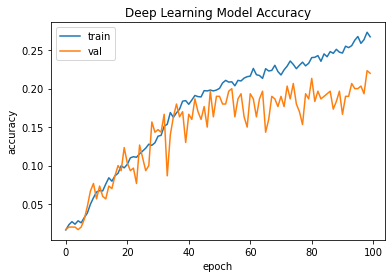

Final Validation Accuracy:  0.2199999988079071


In [46]:
#Experiment 2B: Adding Convolutions with Standard Filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.067 0.063 0.074]
Average kNN Result:  0.068
Gradient Boosting Results:  [0.16  0.141 0.163]
Average Gradient Boosting Result:  0.15466666666666665


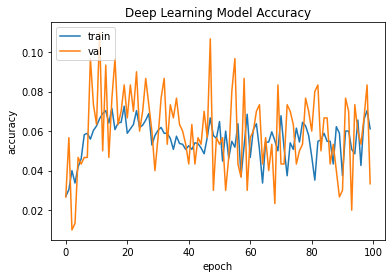

Final Validation Accuracy:  0.03333333507180214


In [47]:
#Experiment 2C: Adding Convolutions with Standard Filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.066 0.056 0.067]
Average kNN Result:  0.063
Gradient Boosting Results:  [0.083 0.075 0.08 ]
Average Gradient Boosting Result:  0.07933333333333333


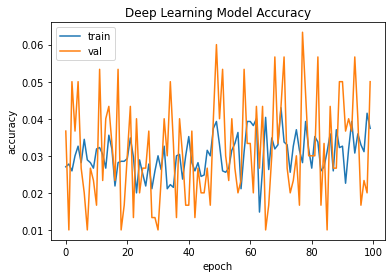

Final Validation Accuracy:  0.05000000074505806


In [48]:
#Experiment 2D: Adding Convolutions with Standard Filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.292 0.266 0.288]
Average kNN Result:  0.28200000000000003
Gradient Boosting Results:  [0.237 0.231 0.249]
Average Gradient Boosting Result:  0.239


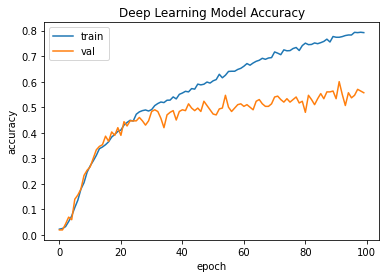

Final Validation Accuracy:  0.5566666722297668


In [49]:
#Experiment 3A: Adding Convolutions with EigenFilters, Persistence Images Concatenated
eigen_filters = Filters.PCA_eigenfilters(X,l=3,n=3)
filters = Filters.random_linear_comb(eigen_filters,5)
diagrams = CPT.CPT(X,filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.236 0.219 0.218]
Average kNN Result:  0.2243333333333333
Gradient Boosting Results:  [0.215 0.215 0.232]
Average Gradient Boosting Result:  0.22066666666666668


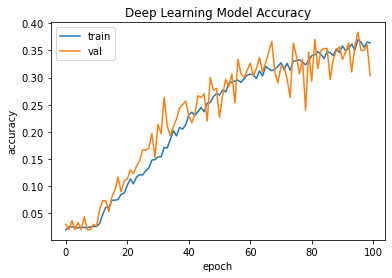

Final Validation Accuracy:  0.3033333420753479


In [50]:
#Experiment 3B: Adding Convolutions with EigenFilters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.353 0.366 0.376]
Average kNN Result:  0.365
Gradient Boosting Results:  [0.335 0.327 0.32 ]
Average Gradient Boosting Result:  0.3273333333333333


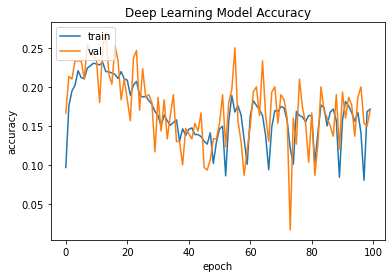

Final Validation Accuracy:  0.17000000178813934


In [51]:
#Experiment 3C: Adding Convolutions with EigenFilters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.126 0.151 0.139]
Average kNN Result:  0.1386666666666667
Gradient Boosting Results:  [0.172 0.171 0.179]
Average Gradient Boosting Result:  0.17400000000000002


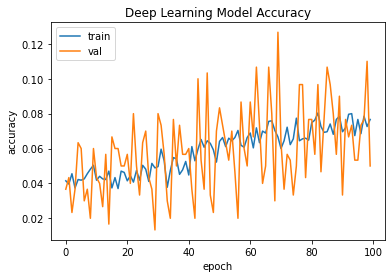

Final Validation Accuracy:  0.05000000074505806


In [52]:
#Experiment 3D: Adding Convolutions with EigenFilters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.271 0.252 0.26 ]
Average kNN Result:  0.261
Gradient Boosting Results:  [0.206 0.197 0.22 ]
Average Gradient Boosting Result:  0.20766666666666667


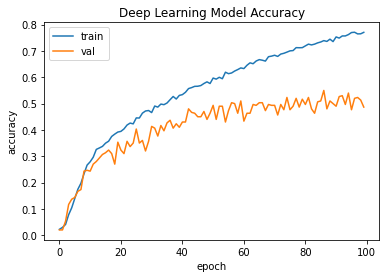

Final Validation Accuracy:  0.4866666793823242


In [53]:
#Experiment 4A: Random Filters, Persistence Images Concatenated
random_filters = Filters.random_filters(l=3,n=5)
diagrams = CPT.CPT(X,random_filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.178 0.168 0.162]
Average kNN Result:  0.16933333333333334
Gradient Boosting Results:  [0.188 0.187 0.188]
Average Gradient Boosting Result:  0.18766666666666665


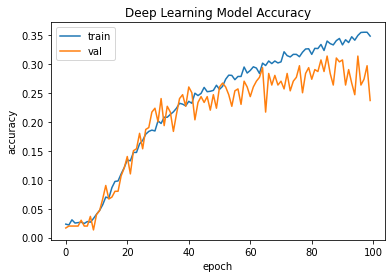

Final Validation Accuracy:  0.23666666448116302


In [54]:
#Experiment 4B: Random Filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.244 0.25  0.259]
Average kNN Result:  0.251
Gradient Boosting Results:  [0.232 0.193 0.205]
Average Gradient Boosting Result:  0.21


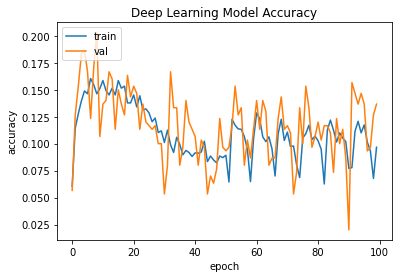

Final Validation Accuracy:  0.1366666704416275


In [55]:
#Experiment 4C: Random Filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.094 0.095 0.098]
Average kNN Result:  0.09566666666666668
Gradient Boosting Results:  [0.11  0.098 0.107]
Average Gradient Boosting Result:  0.105


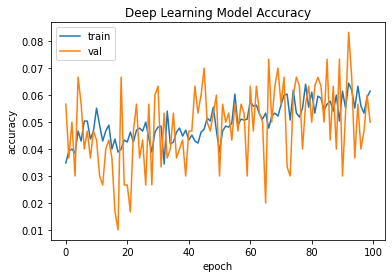

Final Validation Accuracy:  0.05000000074505806


In [56]:
#Experiment 4D: Random Filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)

kNN Results:  [0.377 0.404 0.351]
Average kNN Result:  0.37733333333333335
Gradient Boosting Results:  [0.252 0.249 0.259]
Average Gradient Boosting Result:  0.25333333333333335


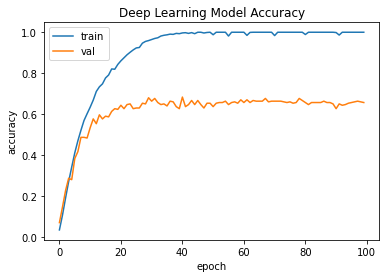

Final Validation Accuracy:  0.6566666960716248


In [57]:
#Experiment 5A: Lots of random filters, Persistence Images Concatenated
random_filters = Filters.random_filters(l=3,n=25)
diagrams = CPT.CPT(X,random_filters)
pers_images = Vectorize.diagrams_to_images(diagrams)
pers_image_con = Vectorize.concatenate_top_features(pers_images)
Testing.test_knn(pers_image_con,y)
Testing.test_boosted_tree(pers_image_con,y)
Testing.test_NN(pers_image_con,y)

kNN Results:  [0.232 0.246 0.237]
Average kNN Result:  0.2383333333333333
Gradient Boosting Results:  [0.193 0.212 0.227]
Average Gradient Boosting Result:  0.21066666666666667


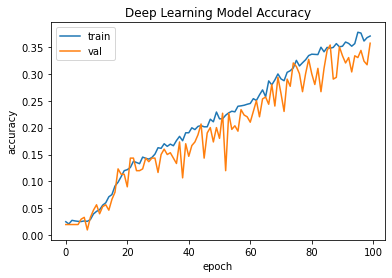

Final Validation Accuracy:  0.3566666543483734


In [59]:
#Experiment 5B: Lots of random filters, Persistence Images Averaged
pers_image_av = Vectorize.average_top_features(pers_images)
Testing.test_knn(pers_image_av,y)
Testing.test_boosted_tree(pers_image_av,y)
Testing.test_NN(pers_image_av,y)

kNN Results:  [0.441 0.456 0.422]
Average kNN Result:  0.43966666666666665
Gradient Boosting Results:  [0.327 0.334 0.368]
Average Gradient Boosting Result:  0.34299999999999997


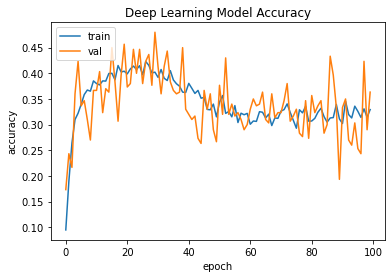

Final Validation Accuracy:  0.3633333444595337


In [60]:
#Experiment 5C: Lots of random filters, Total Persistence Concatenated
tot_pers = Vectorize.diagrams_to_totpers(diagrams)
tot_pers_con = Vectorize.concatenate_top_features(tot_pers)
Testing.test_knn(tot_pers_con,y)
Testing.test_boosted_tree(tot_pers_con,y)
Testing.test_NN(tot_pers_con,y)

kNN Results:  [0.094 0.1   0.095]
Average kNN Result:  0.09633333333333334
Gradient Boosting Results:  [0.117 0.114 0.119]
Average Gradient Boosting Result:  0.11666666666666665


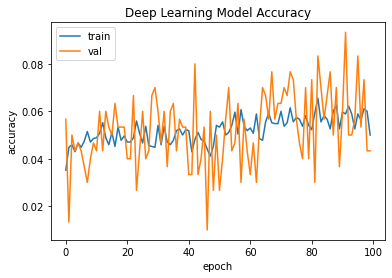

Final Validation Accuracy:  0.04333333298563957


In [61]:
#Experiment 5D: Lots of random filters, Total Persistence Averaged
tot_pers_av = Vectorize.average_top_features(tot_pers)
Testing.test_knn(tot_pers_av,y)
Testing.test_boosted_tree(tot_pers_av,y)
Testing.test_NN(tot_pers_av,y)